In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read in the input datasets for training, test and feature extraction
train = pd.read_csv('./data/external/train.csv')
test = pd.read_csv('./data/external/test.csv')

In [3]:
#Take sample of training dataset
train.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


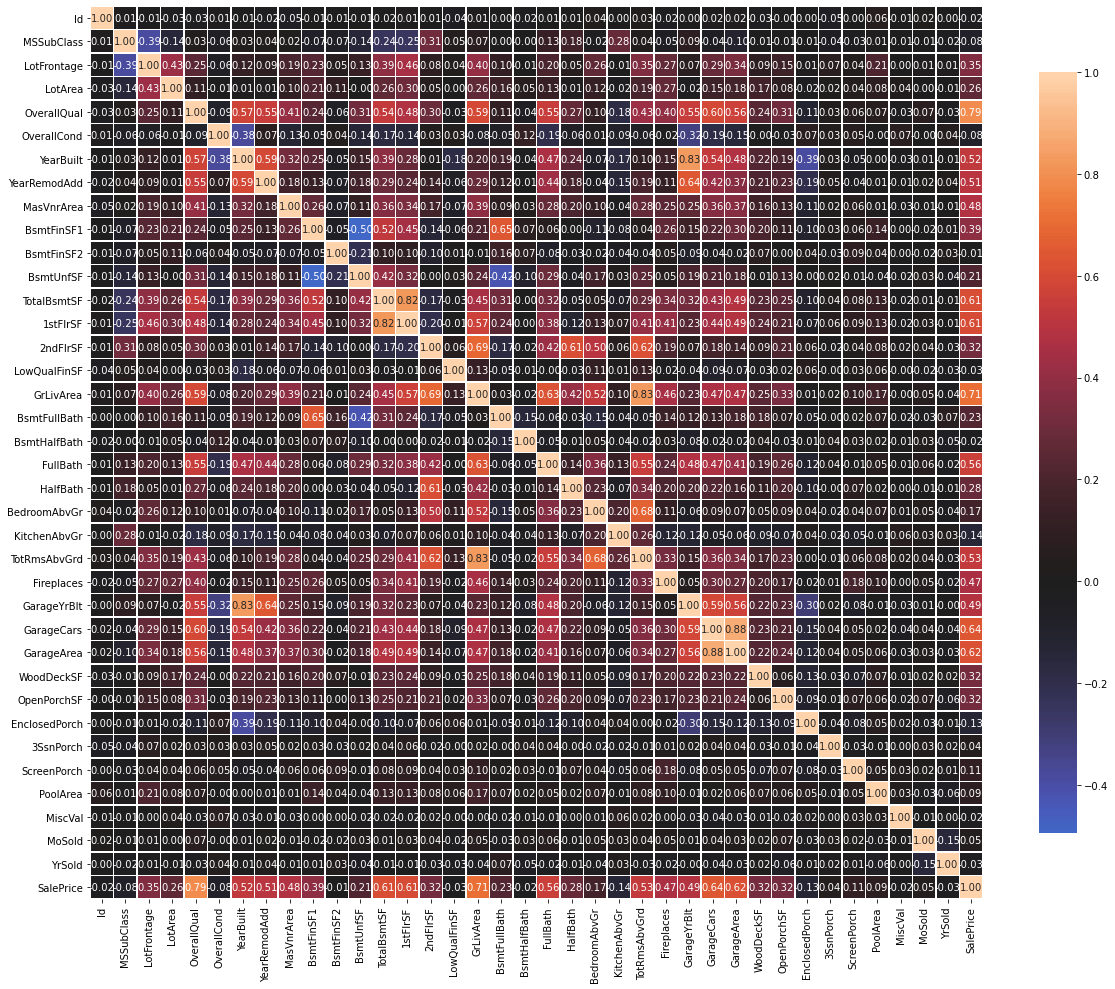

In [4]:
#Plot pearson correlation matrix 
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

In [5]:
len(train)

1460

:BsmtFinSF1:                       |████████▉            | [ 43%]   00:06  -> (00:06 left)

KeyboardInterrupt: 

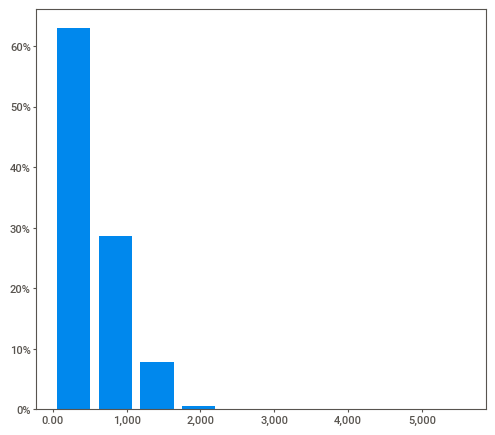

In [6]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(train,pairwise_analysis='on')
#display the report
advert_report.show_html('train_data.html')

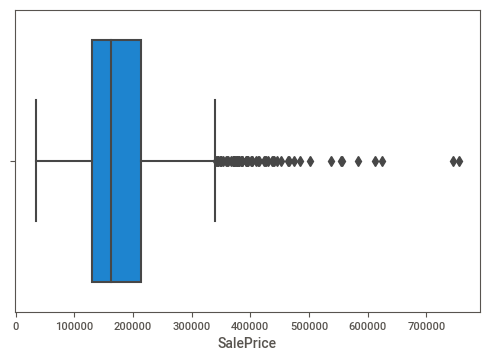

In [7]:
import seaborn as sns
sns.boxplot(x=train['SalePrice'])

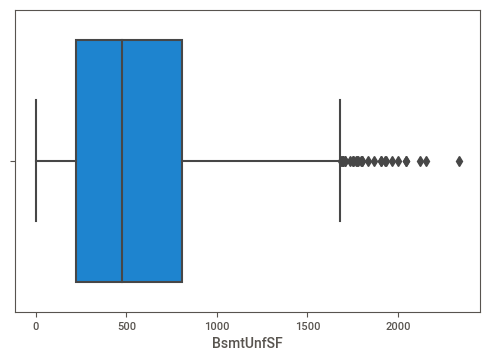

In [8]:
import seaborn as sns
sns.boxplot(x=train['BsmtUnfSF'])

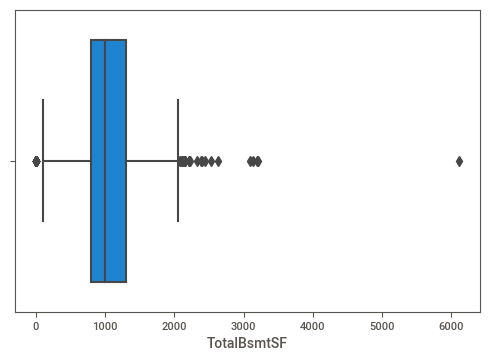

In [9]:
import seaborn as sns
sns.boxplot(x=train['TotalBsmtSF'])

In [11]:
correlations = train.corr()

In [42]:
dependent_col = ['SalePrice','Id']
corr_df = pd.DataFrame(correlations['SalePrice']).reset_index().rename(columns={'index':'Correlated_Column'})
corr_df = corr_df.loc[corr_df['SalePrice'].abs()>0.4]
corr_cols = [col for col in corr_df['Correlated_Column'].values.tolist() if col not in dependent_col]
corr_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']